# House Prices: Statistical Analysis

## 1. Goal

Do a comprehensive statistical analysis of a data set describing the sale of individual residential property in Ames (Iowa) from 2006 to 2010. We will construct a model describing the price of the properties in function of some of the features described in the dataset.

## 2. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")

## 3. Data wrangling

In [2]:
# loading the data set
df = pd.read_csv("train.csv")

We explore the data set:

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3.1. Removing irrelevant columns and filling null values

We make use of a previously defined function (Project 2, Module 1) that computes the proportion of ``NaN`` values within the dataframe:

In [4]:
def null_cols(data):
    
    """
    This function takes a dataframe df and shows the columns of df that have NaN values
    and the number of them
    
    """
    
    nulls = data.isna().sum()
    return nulls[nulls > 0] / len(data) * 100


In [5]:
null_cols(df)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

First, we remove the columns ``Alley``, ``PoolQC``, and ``MiscFeature`` with over 90% of missing values. Also, according with the definition of the dataframe columns, these 3 fields does not have relevant information for our analysis.

In [6]:
df.drop(columns = ["Alley", "PoolQC", "MiscFeature"], inplace = True)

In [7]:
null_cols(df)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
Fence           80.753425
dtype: float64

The column ``Fence`` indicates the quality of the property's fence. We also drop this column because it is not relevant for our analysis and has 80% of ``NaN`` values.

In [8]:
df.drop(columns = ["Fence"], inplace = True)

In [9]:
null_cols(df)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
dfc = df.copy()

cols_NA = ["BsmtQual", 
          "BsmtCond", 
          "BsmtExposure", 
          "BsmtFinType1", 
          "BsmtFinType2", 
          "FireplaceQu", 
          "GarageType", 
          "GarageFinish", 
          "GarageQual", 
          "GarageCond"]

In [12]:
for col in cols_NA:
    dfc[col].fillna("NA", inplace = True)

In [13]:
null_cols(dfc)

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64

We can replace the ``NaN``'s at the Lotfrontage and ``MasVnrArea`` columns with 0, meaning the property does not have any street frontage or any masonry veener:

In [14]:
for col in ["LotFrontage", "MasVnrArea"]:
    dfc[col].fillna(0, inplace = True)

Also, if the property does not have any electrical system inbuilt, or any masonry veneer we can replace these values with ```"None"```:

In [15]:
for col in ["MasVnrType", "Electrical"]:
    dfc[col].fillna("None", inplace = True)

In [16]:
null_cols(dfc)

GarageYrBlt    5.547945
dtype: float64

### 3.2. Converting columns to boolean

We rename some of the columns to make it more descriptive: 

In [17]:
col_names = ({"Street": "Pave",
              "BldgType": "Property_Type",
              "HouseStyle": "Storeys",
              "Electrical": "Elect_system",
              "BsmtUnfSF": "BsmtArea_u",
              "TotalBsmt":"Bsmt_Total_Area",
              "1stFlrSF": "Area_1stFL",
              "2ndFlrSF": "Area_2ndFL",
              "LowQualFinSF": "LowQual_Area",
              "GrLivArea": "HighQual_Area",
               }
            )

dfc = dfc.rename(columns = col_names)

In [18]:
dfc.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

We replace ``NAmes`` with ``North Ames`` for avoiding missunderstandings:

In [19]:
dfc["Neighborhood"] = df["Neighborhood"].str.replace("NAmes", "North Ames")

Now, we will convert some of the columns to boolean; as all of them take different values, we should do this procedure one by one:

In [20]:
dfc["Pave"] = np.where(dfc["Pave"]== "Pave", 1, 0)

dfc["Utilities"]= np.where(dfc["Utilities"]== "NoSeWa", 0, 1)

dfc["CentralAir"] = np.where(dfc["CentralAir"]== "Y", 1, 0)

### 3.3. Labeling ordinal categorical variables

As many of the columns are categorical and ordinal, we will factorized them in Pandas. First, we create lists containing the recurrent values that we want to label for each relevant column.

In [21]:
cat_qual = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
col_cat_qual = ["HeatingQC", "KitchenQual", "FireplaceQu", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "GarageQual"]

cat_lot = ["IR3", "IR2", "IR1", "Reg"] # ["LotShape"]

land_sl = ["Sev", "Mod", "Gtl"] # Landslope

pav_div = ["N", "P", "Y"] #["PavedDrive"]

bsm_ty = ["NA","Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"] #
col_bsm_ty =["BsmtFinType1", "BsmtFinType2"]

bsmt_exp = ["No", "Mn", "Av", "Gd"] #["BsmtExposure"]

cat_funct = ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"] # Functional

In [22]:
def label_c(cat, col, data):
    """
    Labels with ordinals a col of a dataframe data by using the values in the category cat
    """
    categories = pd.Categorical(data[col], categories=cat, ordered=True)
    labels, unique = pd.factorize(categories, sort=True)
    data[col] = labels

Now, we apply this function to each corresponding column or list of columns.

In [23]:
for cols in col_cat_qual:
    label_c(cat_qual, cols, dfc)

In [24]:
dfc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Pave,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Property_Type,Storeys,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtArea_u,TotalBsmtSF,Heating,HeatingQC,CentralAir,Elect_system,Area_1stFL,Area_2ndFL,LowQual_Area,HighQual_Area,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,2,PConc,3,3,No,GLQ,706,Unf,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,Reg,Lvl,1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,1,2,CBlock,3,3,Gd,ALQ,978,Unf,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,1,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,IR1,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,2,PConc,3,3,Mn,GLQ,486,Unf,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,IR1,Lvl,1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,1,2,BrkTil,2,4,No,ALQ,216,Unf,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,IR1,Lvl,1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,2,PConc,3,3,Av,GLQ,655,Unf,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
for cols in col_bsm_ty:
    label_c(bsm_ty, cols, dfc)

In [26]:
label_c(cat_lot, "LotShape", dfc)
label_c(pav_div, "PavedDrive", dfc)
label_c(bsmt_exp, "BsmtExposure", dfc)
label_c(cat_funct, "Functional", dfc)
label_c(land_sl, "LandSlope", dfc) # Landslope


In [27]:
dfc.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

We note that the data type of "GarageYrBlt" is not correct:

In [28]:
dfc[["GarageYrBlt"]].dtypes

GarageYrBlt    float64
dtype: object

We convert this to int:

In [29]:
dfc["GarageYrBlt"]= dfc["GarageYrBlt"].fillna(0.0).astype(int)

### 3.4. Removing columns with low variance

We are going to drop the columns that contain low variance. For us, low variance means that the minimum value obtained of a feature is equal to its 90th percentile.

In [30]:
def detect_low_variance(data, col, perc):
    min_val = data[col].min()
    perc_val = np.percentile(data[col], perc)
    return min_val == perc_val

In [31]:
low_var = [col for col in dfc.select_dtypes(include = [np.number]).columns if detect_low_variance(dfc, col, 90)]
dfc = dfc.drop(low_var, axis=1)

### 3.5. Adding new features

We create two columns containing the Gross living area ``GLA`` and Gross Building Area ``GBA``:

In [32]:
dfc["GLA"] = dfc["Area_1stFL"] + dfc["Area_2ndFL"]
dfc["GBA"]= dfc["GLA"] + dfc["TotalBsmtSF"] + dfc["GarageArea"]

Also, we will aggregate the total number of Bathrooms at the house, droppping then the original columns containing the splitted information.

In [33]:
dfc["no_bathrooms"] = dfc["BsmtFullBath"] + dfc["FullBath"] + dfc["HalfBath"]
dfc.drop(columns = ["BsmtFullBath","FullBath","HalfBath"], axis = 1, inplace= True)

In [34]:
dfc.no_bathrooms.describe()

count    1460.000000
mean        2.373288
std         0.920991
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: no_bathrooms, dtype: float64

## 4. Adjusting skewed data

First, we will see what is the distribution of the house prices in order to detect any outliers:

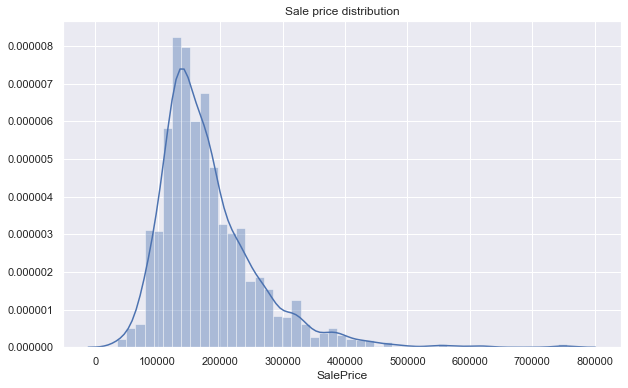

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(dfc['SalePrice'])
ax.set_title("Sale price distribution");

In [36]:
dfc["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

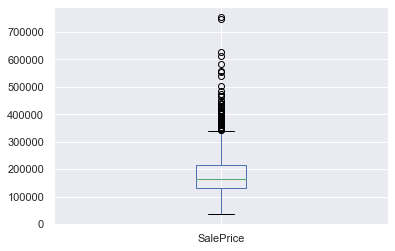

In [37]:
dfc.boxplot(column=['SalePrice']);

We see a big number of outliers for the ``SalePrice``. We obtain similar results by considering the features Gross Building Area``GBA`` and Gross living area ``GLA``.

### 4.1. Detect outliers by Sale condition

There is a very important feature that might be behind the skewness of our data, namely the sale condition. Obviously, if the property have to be sold in abnormal conditions, the price might not reflect its real value. We explore this possible issue by means of a scattered plot:

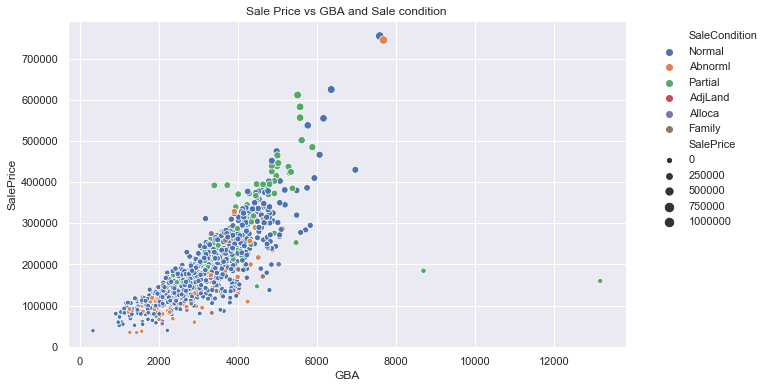

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data = dfc,
                x = "GBA",
                y = "SalePrice",
                hue= "SaleCondition",
                size = "SalePrice",
                ax= ax).legend(bbox_to_anchor=(1.04,1), loc="upper left",frameon= False)
ax.set_title("Sale Price vs GBA and Sale condition");

We see that some outliers of our dataset are linked with properties sold with sale condition ``Partial`` and ``Abnormal``. According with the explanation of the data set, an abnormal sale condition correspond to a trade, fortclosure, short sale and a partial sale condition corresponds to properties thet were sold without being finished. This suggest us to consider only properties that were sold in normal conditions:

In [39]:
# Here we filter the data set to only consider Normal sale conditions

train = dfc[dfc.SaleCondition== "Normal"].copy()
train.drop(columns = ["SaleCondition"], inplace= True)

### 4.2. Detect outliers by using interquartal range

Next we will use the interquartal range (IQR) in order to detect and drop the outliers. The relevant columns that we consider now are ``SalePrice``, ``GLA``, ``GBA`` and ``GarageArea``. Remember that ``GarageArea`` is a component of ``GBA``.

To detect and remove the outliers of several columns at once, we createthe function ``iqr``:

In [40]:
def iqr(data, cols, t):
    
    """
    This function computes the interquartal range with rule t.
    "data" is a dataframe, "cols" is a list of columns with numerical values
    from "data" and "t" is a positive number. Usually t takes the value 1.5.
    iqr returns a dictionary of dictionaries containing the lower and upper
    extremes of the adjusted IQR for each column.
    """
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3-Q1
    low_bound = {}
    upp_bound = {}
    for col in list(IQR.index):
        low_bound[col] = Q1[col]-t*IQR[col]
        upp_bound[col] = Q3[col]+t*IQR[col]
    return {"low_b": low_bound, "upp_b": upp_bound}       

Applying our function to the relevant columns we obtain:

In [41]:
iqr_d = iqr(train,["GarageArea", "GLA", "GBA", "SalePrice", "HighQual_Area"] , 1.5)
iqr_d

{'low_b': {'GarageArea': -77.625,
  'GLA': 107.375,
  'GBA': 703.625,
  'SalePrice': 17500.0,
  'HighQual_Area': 126.25},
 'upp_b': {'GarageArea': 963.375,
  'GLA': 2752.375,
  'GBA': 5152.625,
  'SalePrice': 317500.0,
  'HighQual_Area': 2750.25}}

Now we will remove the outliers for each of these columns:

In [42]:
for col in ["GarageArea", "GLA", "GBA", "SalePrice", "HighQual_Area"]:
    train = train[~((train[col]< iqr_d["low_b"][col]) | (train[col]> iqr_d["upp_b"][col]))]

Below we see how was affected the distribution of ``SalePrice`` and ``GBA`` after removing outliers: 

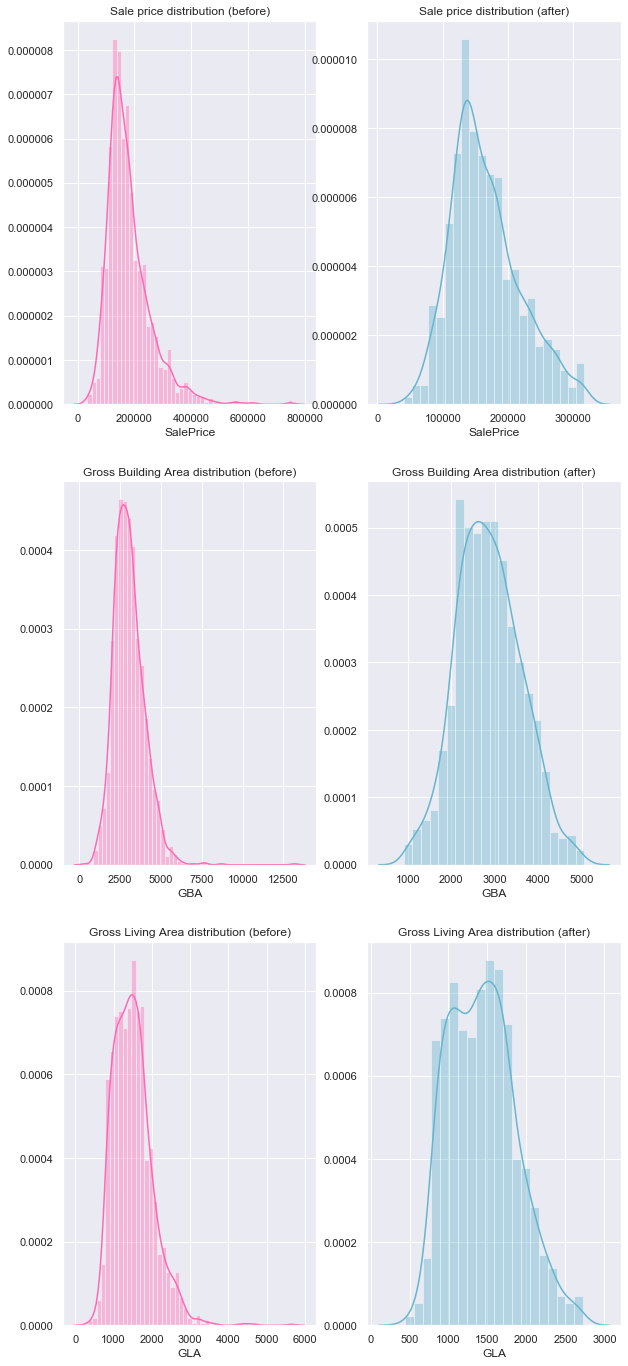

In [43]:
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(10, 24))

(sns.distplot(dfc['SalePrice'], ax= ax[0][0], color= "hotpink")
    .set_title("Sale price distribution (before)"));

(sns.distplot(train['SalePrice'], ax= ax[0][1], color = "c")
    .set_title("Sale price distribution (after)"))

(sns.distplot(dfc['GBA'], ax= ax[1][0], color= "hotpink")
    .set_title("Gross Building Area distribution (before)"));

(sns.distplot(train['GBA'], ax= ax[1][1], color = "c")
    .set_title("Gross Building Area distribution (after)"));

(sns.distplot(dfc['GLA'], ax= ax[2][0], color= "hotpink")
    .set_title("Gross Living Area distribution (before)"));

(sns.distplot(train['GLA'], ax= ax[2][1], color = "c")
    .set_title("Gross Living Area distribution (after)"));


Once we have remove many of the outliers of our data set, we can observe better the relationship between the Gross Building Area and the sale price of the property:

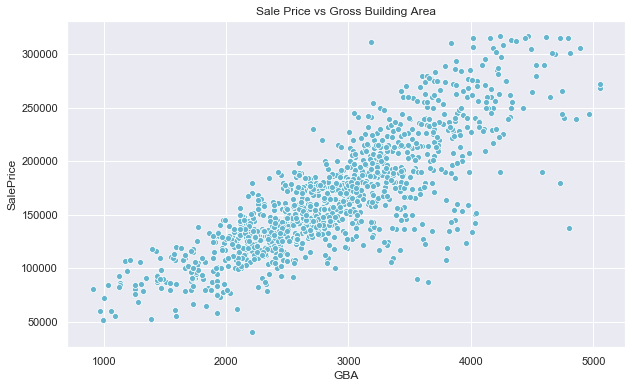

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data = train,
                x = "GBA",
                y = "SalePrice",
                color = "c",
                ax= ax);
ax.set_title("Sale Price vs Gross Building Area");



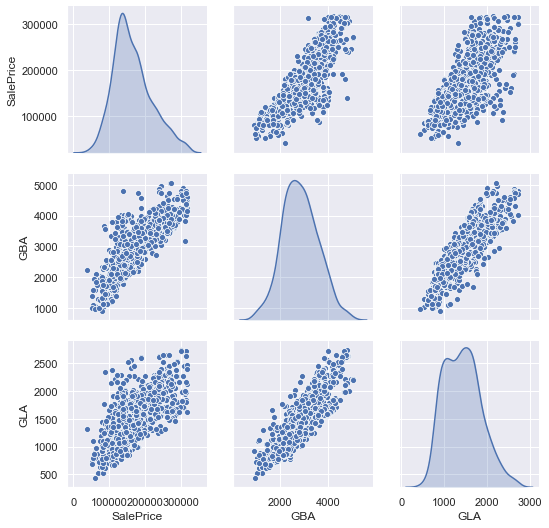

In [45]:
sns.pairplot(data = train,
             diag_kind="kde",
             vars =["SalePrice", "GBA", "GLA"]);


From this, we can conclude that certainly there is correlation between the variables. We create a list containing all the relevant variables we will finding:

In [46]:
cat_var = []
num_var = ["SalePrice", "GBA", "GLA"]

# 5. Feature Engineering

## 5.1.Neighborhood Analysis

We have intuition that the neighborhood where is locate the property should influence its sale price. However after seeing how spread are the sale prices in each neighborhood, we better explore the distribution of the properties by neighborhood:

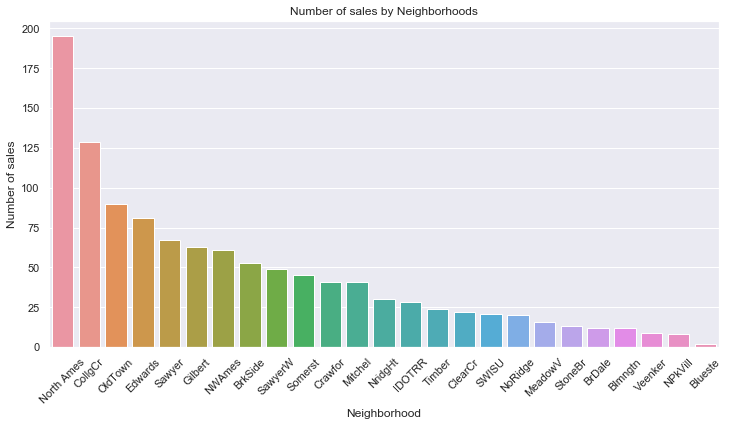

In [47]:
# List of neighborhoods ordered by frequency
neigh= list(train.Neighborhood.value_counts().index)
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data = train,
              x= "Neighborhood",
              order= neigh,
              orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_title('Number of sales by Neighborhoods')
ax.set_ylabel('Number of sales', fontsize=12);
ax.set_xlabel('Neighborhood', fontsize=12);


We will explore now the median and mean of the properties price per Neighborhood:

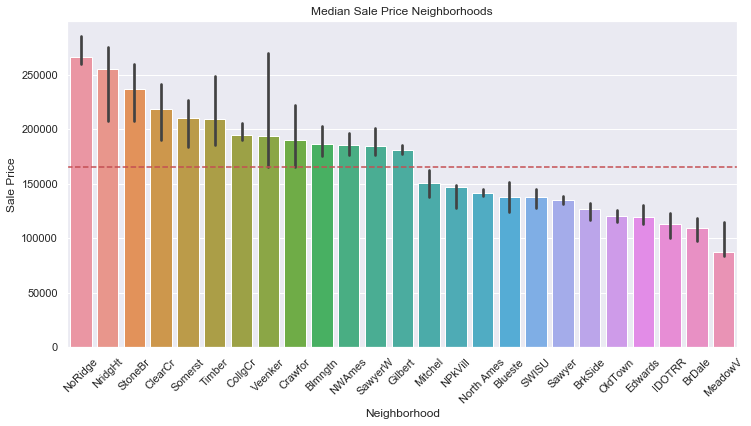

In [48]:
# This data frame contains the medians of the Sale Price by Neighborhood

medians = (train[["Neighborhood", "SalePrice"]].groupby("Neighborhood")
                                               .median()
                                               .sort_values("SalePrice", ascending = False)
                                               .reset_index())


fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data = train,
            x= "Neighborhood",
            y= "SalePrice",
            estimator = np.median,
            order = list(medians["Neighborhood"])).set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.axhline(train.SalePrice.mean(), ls='--', color = "r")
ax.set_title('Median Sale Price Neighborhoods')
ax.set_ylabel('Sale Price', fontsize=12);
ax.set_xlabel('Neighborhood', fontsize=12);

The highest median property value is in ``NoRidge`` and ``NridgHt``, so these are good neighborhoods for buying dwellings. Notice also that the most popular neighborhhod ``North Ames`` is not the cheapest area to buy a property, but its median price is below the average price for properties in Ames. 

Lastly, we can see that the relation between``GBA`` and ``SalePrice`` remains when consider each neighborhood.

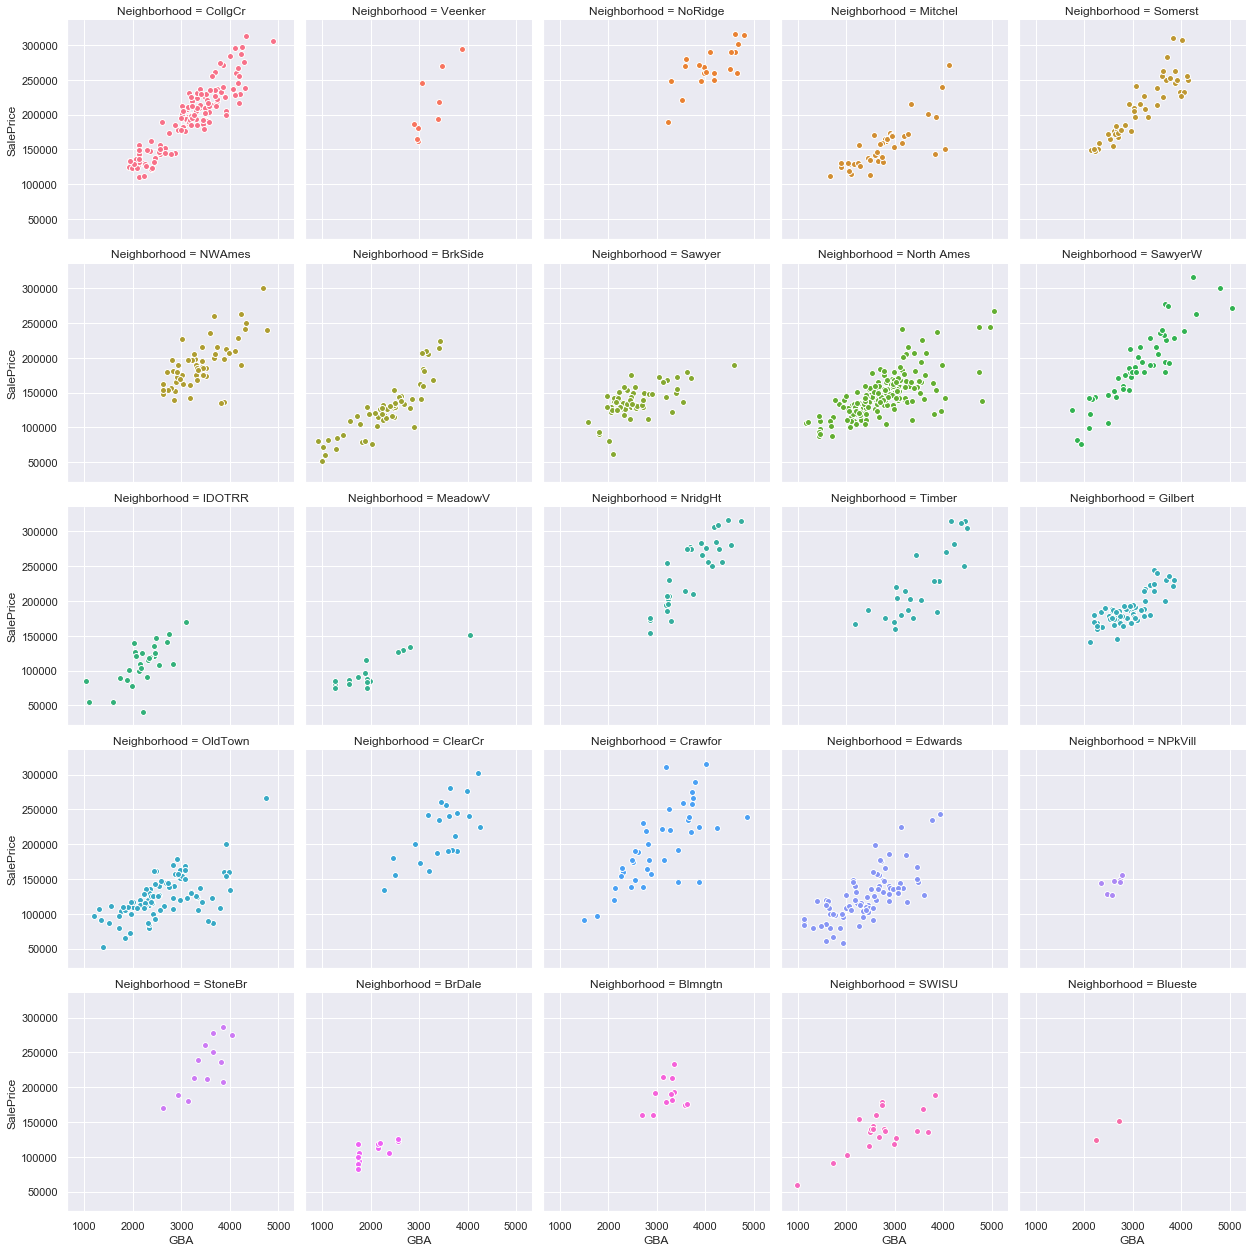

In [49]:
g = sns.FacetGrid(data = train,
                  col = "Neighborhood",
                  hue = "Neighborhood",
                  col_wrap = 5,
                  height= 3.5)
g = g.map(plt.scatter, "GBA", "SalePrice", edgecolor="w")

### 5.1.1. Labeling Neighborhoods

Given the importance of this feature, we label the Neighborhoods by using their rank relative to the median sale price:

In [50]:
neigh_list = list(medians.sort_values("SalePrice")["Neighborhood"])

train["Neigh_label"] = train["Neighborhood"].apply(lambda name: neigh_list.index(name))


## 5.2. Quality and Overall condition Features

It is natural to think that there is some relation between the sale price and the quality and condition of a property.

After exploring the values of ``OverallCond`` and ``OverallQual``, we decide to bucket them, in order to deal with less values for those features:


In [51]:
for col in ["OverallCond", "OverallQual"]:
    print(df[col].value_counts())

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


In [52]:
def cond_qual(n):
    """
    Returns the bucket category of OverallCond and OverallQual for each rank
    """
    if n in range(1,4):
        return 1
    elif n in range(4, 8):
        return n-2
    else:
        return 6

for col in ["OverallQual", "OverallCond"]:
    train[col] = train[col].apply(cond_qual)  

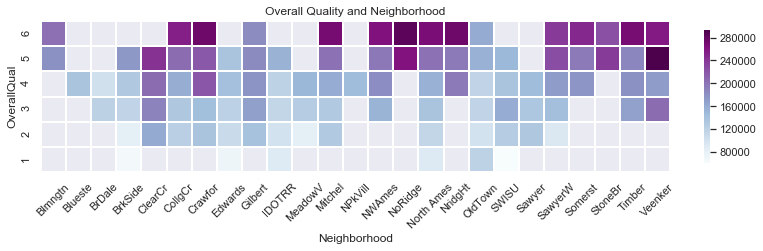

In [53]:
fig, ax = plt.subplots(figsize=(12,12))

#We use the function crosstab in pandas to create a contingency table, crossing OverallQuality and Neighborhood by computing the median
sns.heatmap(pd.crosstab(train.OverallQual, train.Neighborhood, values = train.SalePrice, aggfunc = "median"),
            cmap="BuPu", 
            square=True, # make cells square
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1, # space between cells
            ax = ax).set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set(ylim=(0, 6));

ax.set_title("Overall Quality and Neighborhood");

The average price and the overall quality of the properties seems to correlate positively. Now, the places with bigger average value of dwellings, seem to have properties with quality rating above 7.  See NridgHt, NoRidge, Bimngtn, Sommerst, StoneBr, etc.

Should this tendency remains by considering ``OverallCond`` instead?

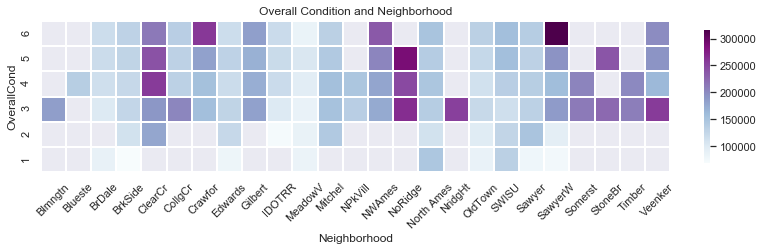

In [54]:
fig, ax = plt.subplots(figsize=(12,12))

#We use the function crosstab in pandas to create a contingency table, crossing OverallQuality and Neighborhood by computing the median
sns.heatmap(pd.crosstab(train.OverallCond, train.Neighborhood, values = train.SalePrice, aggfunc = "median"),
            cmap="BuPu", 
            square=True, # make cells square
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1, # space between cells
            ax = ax).set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set(ylim=(0, 6));

ax.set_title("Overall Condition and Neighborhood");

All the properties in NridgHt and Bimngtn have a overall condition rank between 3 and 5 and the Sale price in these Neighborhoods is high though. 

On the other side, in NorthAmes the overall condition most frequent is 6 and also this neighborhood concentrates the majority of property sales. So it might be the case that the overall condition plays a relevant role for the buyer but it is not influencing in a reasonable way the price. 

## 5.3. Age of the Property

Another important feature to consider is the time in years between the sale year and the last remodelation that the property had. We call this feature the ``Property_age`` and create a column for it:

In [55]:
train["Property_age"] = train["YrSold"] - train["YearRemodAdd"]
train.Property_age.describe()

count    1132.000000
mean       24.856890
std        20.302679
min         0.000000
25%         6.000000
50%        17.500000
75%        44.000000
max        60.000000
Name: Property_age, dtype: float64

Note that 50% of the properties have less than 17 years. For prevent skewness we will bucket the age after 6 years in some groups:

In [56]:
def buck_age(n):
    """
    Returns the bucket category of Property age for each integer
    """
    if n in range(6):
        return n
    elif n in range(6, 11):
        return 6
    else:
        if n%10 ==0:
            return 5 + n/10
        else:
            return 6 + math.floor(n/10)
        
train["Property_age"] = train["Property_age"].apply(buck_age)

In the chart below, we see a subtle decreasing relation between the property age and the sale price. Therefore, we include this variable in our analysis.

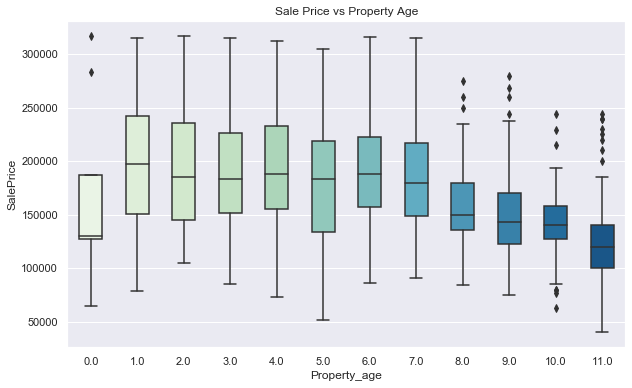

In [57]:
cat_var.append("Property_age")

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data= train,
            y='SalePrice',
            x='Property_age', 
            width=0.5,
            palette =("GnBu"),
            ax= ax);

ax.set_title("Sale Price vs Property Age");


## 5.4. Functionality of the property

The feature ``Functional`` which rates the functionality of the property from Salvage status (0) to Typical (6) is also important when considering the property value; there is a marked positive relation between these variables:

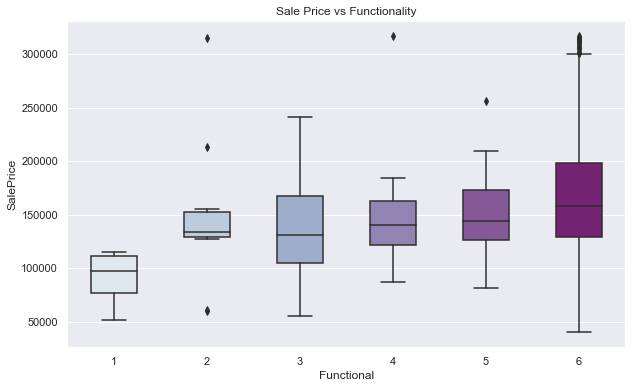

In [58]:
cat_var.append("Functional")

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data= train,
            y='SalePrice',
            x='Functional', 
            width=0.5,
            ax= ax,
            palette =("BuPu"));

ax.set_title("Sale Price vs Functionality");


## 6. Constructing a model to predict the Sale price

### 6.1. Correlation matrices for categorical and numerical features

In order to construct a suitable model, we will see how the diferent features behave with ``SalePrice`` by constructing the correlation matrix. 

For the categorical variables, we will use Spearman correlation coeficient because these variables have ordinal nature and we have seen that the Sale price is in increasing relation whith the Quality of the property. 

For the numerical variables there are no significative difference when considering Pearson correlation in this case, given that most of the numerical variables have nearly normal distributions, and, on the other side most of them are in monotonous relation with ``SalePrice``.


In [59]:
#Grouping numerical and categorical variables
features_num = ["LotFrontage",  "MasVnrArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd",  "Fireplaces",  "GarageCars",  "WoodDeckSF", "OpenPorchSF", "SalePrice", "GLA", "GBA", "no_bathrooms",  "Property_age"]
features_cat = ["Neigh_label", "SalePrice", "Pave", "BsmtFinType1", "LotShape", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "HeatingQC", "CentralAir", "KitchenQual",  "Functional", "FireplaceQu", "GarageQual", "GarageCond", "PavedDrive"] 

#New data sets to construct the matrices
train_n = train[features_num]
train_c = train[features_cat]

#correlation matrices
corr_cat = train_c.corr(method = "spearman")
corr_num = train_n.corr(method = "spearman")

#We will consider any categorical column having mild Spearman correlation with the SalePrice

corr_cat_list = list(corr_cat[abs(corr_cat["SalePrice"])>0.40].index)
corr_num_list = list(corr_num[abs(corr_num["SalePrice"])>0.40].index)

Now we will plot these features in a heatmap. First, lets have a look to the categorical features:

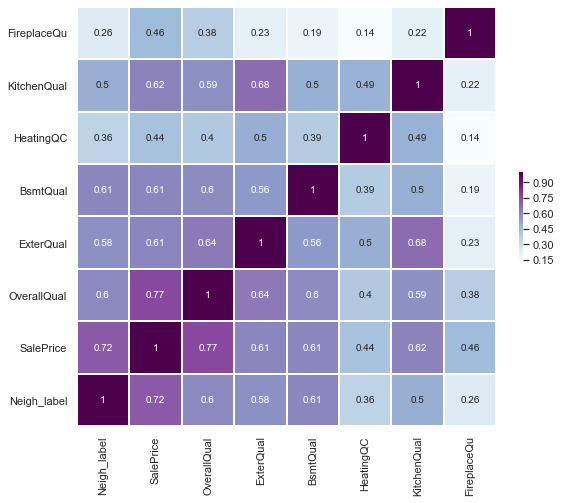

In [60]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(corr_cat[corr_cat.index.isin(corr_cat_list)][corr_cat_list],
            annot = True,
            square=True,
            linewidth=1,# space between cells
            cmap="BuPu", 
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            ax = ax);
ax.set(ylim=(0, 8));

From here, we see that ``Neigh_label``, ``OverallQual``, ``ExterQual``, ``BsmtQual``, ``KitchenQual`` are strong correlated with ``SalePrice``so we will include them in our model. 

In [61]:
cat_var = ["Neigh_label", "OverallQual", "ExterQual", "BsmtQual", "KitchenQual"]

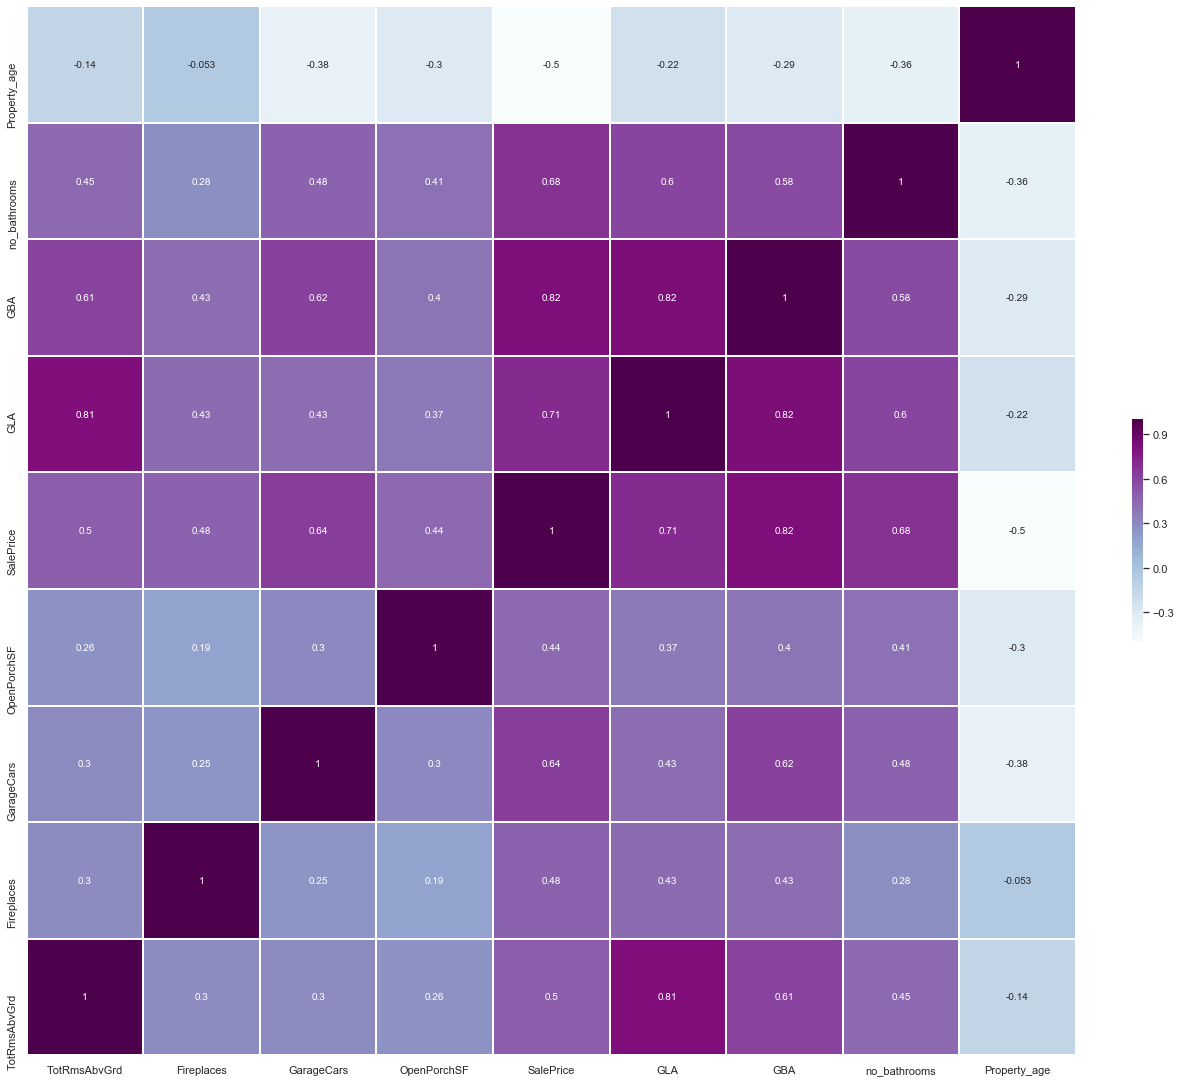

In [62]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(corr_num[corr_num.index.isin(corr_num_list)][corr_num_list],
            annot = True,
            square=True,
            linewidth=1,# space between cells
            cmap="BuPu", 
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            ax = ax);
ax.set(ylim=(0, 9));

Here we see a moderate correlation between ``SalePrice`` and ``TotRmsabvGrd``,  ``GarageCars``, ``Property_age``. On the other side we validate our conclusions about a strong correlation between the price of the property and ``GLA``, ``GBA`` and, as a new feature we add ``no_bathrooms`` to our model.

In [63]:
num_var = ["TotRmsAbvGrd", "GarageCars", "Property_age", "GLA", "GBA", "no_bathrooms"]

The results by using Pearson coefficient with the numerical variables give us the same moderately to strongly correlated variables.

## 6.2. Calculating our model via Ridge Regression

### 6.2.1. Warnings by using OLS method

First, we will explore the results of performing OLS modeling to predict the price of the properties in function of the relevant features.

In [64]:
X_train = train[cat_var + num_var]
y = train['SalePrice'] # output variable (what we are trying to predict)

# with statsmodels
X_train = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y, X_train).fit()
predictions = model.predict(X_train) 
 
model.summary()

/Users/Fabi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     594.5
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:18:23   Log-Likelihood:                -12830.
No. Observations:                1132   AIC:                         2.568e+04
Df Residuals:                    1120   BIC:                         2.574e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2392.9900   4900.070      0.488      0.625   -7221.361     1.2e+04
Neigh_label   1751.5024    138.073     12.685      0.000    1480.591    2022.414
OverallQual   8994.8440    838.879     10.722      0.000    7348.893    1.06e+04
ExterQual     1354.1235   1863.347      0.727      0.468   -2301.921    5010.168
BsmtQual      -456.4095   1183.339     -0.386      0.700   -2778.220    1865.401
KitchenQual   8525.9301   1526.401      5.586      0.000    5531.003    1.15e+04
TotRmsAbvGrd -2379.1453    729.731     -3.260      0.001   -3810.938    -947.352
GarageCars     943.5907   1256.141      0.751      0.453   -1521.065    3408.246
Property_age -1216.6438    264.722     -4.596      0.000   -1736.052    -697.236
GLA             17.6868      3.699      4.781      0.000      10.429      24.945
GBA             27.6942      1.855     14.931      0.000      24.055      31.334
no_bathrooms  5876.6879    980.193      5.995      0.000    3953.467    7799.908
==============================================================================
Omnibus:                       29.503   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.706
Skew:                           0.022   Prob(JB):                     5.40e-15
Kurtosis:                       4.179   Cond. No.                     2.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Result:** Due to the multicollinearity of some of the variables, OLS is not suitable in this case. Despite of this, by using this method, we obtain a high $R-squared$ value (0.854).

### 6.2.2. Ridge Method (Regularization) and feature selection

In order to use Ridge regression, we should standardize the independent variables first.

In [65]:
#Defining the variables

X_train = train[cat_var + num_var]
y = train['SalePrice'] # output variable (what we are trying to predict)

#Standardizing the independent variables
st_X_train = preprocessing.scale(X_train)

#Initializing the model
ridge_model = Ridge(alpha=0.0)
ridge_model.fit(st_X_train, y) 

ridge_summary_0 = pd.DataFrame({"Variable": X_train.columns, "coeficient": ridge_model.coef_})

print('Constant: \n', ridge_model.intercept_)


Constant: 
 165601.2058303887


In [66]:
ridge_summary_0

,Variable,coeficient
0,Neigh_label,11045.913953
1,OverallQual,10518.466505
2,ExterQual,672.743895
3,BsmtQual,-331.822762
4,KitchenQual,5068.066620
5,TotRmsAbvGrd,-3446.485048
6,GarageCars,635.678415
7,Property_age,-3667.338285
8,GLA,7568.795751
9,GBA,20550.951982


As we see above, we set $\alpha =0$, giving place at the usual OLS regression. Now we will explore what is going on with the beta coeficients when $\alpha$ changes:

In [67]:
alphas = np.arange(1,200,1)
ridge_model = Ridge(alpha=0.0)
ridge_model.fit(st_X_train, y) 
ridge_betas = pd.DataFrame({"Variable": X_train.columns, "coeficient": ridge_model.coef_})

predictions = []
test_predictions = []

#Iterating values of alpha from 0 to 200:

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(st_X_train, y)
    var_name = "coeficient" + str(alpha)
    ridge_betas[var_name] = ridge_model.coef_
    predictions.append(ridge_model.predict(st_X_train))

# Creating a dataframe containing the beta-coeficients for each alpha

ridge_betas = ridge_betas.set_index("Variable").T.rename_axis("coeficient").rename_axis(None, axis=1).reset_index()
ridge_betas.drop("coeficient", inplace= True, axis = 1)    
    

We will analize the behaviour of the beta coeficients with $\alpha$, in order to select some of the features for our model:

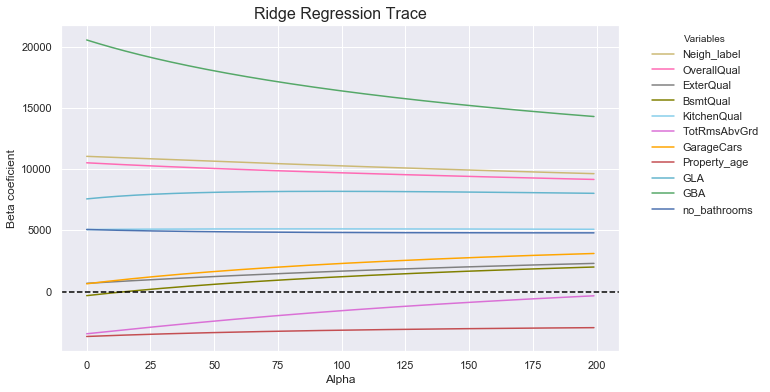

In [68]:
fig, ax = plt.subplots(figsize= (10,6))

(ax.plot(ridge_betas.Neigh_label, "y",
         ridge_betas.OverallQual, "hotpink",
         ridge_betas.ExterQual, "grey",
         ridge_betas.BsmtQual, "olive",
         ridge_betas.KitchenQual, "skyblue",
         ridge_betas.TotRmsAbvGrd, "orchid", 
         ridge_betas.GarageCars, "orange",
         ridge_betas.Property_age, "r",
         ridge_betas.GLA, "c",
         ridge_betas.GBA, "g",
         ridge_betas.no_bathrooms, "b"));

ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Alpha")
ax.set_ylabel("Beta coeficient")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=list(ridge_betas.columns),bbox_to_anchor=(1.04,1), loc="upper left",frameon= False, title= "Variables");

Observe that as $\alpha$ increases, ``TotRmsAbvGrd`` approach to 0 while ``ExterQual`` and ``GarageCars`` diverge from 0. This suggest that ``TotRmsAbvGrd`` get cast out after certain point and it is not an important variable in our model. Notice that the other features stay with few changes along the iteration. From this analysis we decide to omit the total number of rooms above grade from our model.

In [69]:
X_train.drop(columns = ["TotRmsAbvGrd"], inplace= True)

st_X_train = preprocessing.scale(X_train)

/Users/Fabi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now, Scikit-learn has a module that allow us select the best value for $\alpha$:

In [70]:
#We take the alphas list defined above
m = np.arange(1,200,0.1)
ridge_model = RidgeCV(alphas = m)
ridge_model.fit(st_X_train, y) 

#This will show the optimal value for alpha

print("The best value for alpha is {}".format(ridge_model.alpha_))

The best value for alpha is 8.000000000000007


So we set $\alpha= 8$ for the final model.

In [71]:
ridge_model = Ridge(alpha=8.0)
ridge_model.fit(st_X_train, y) 
ridge_betas = pd.DataFrame({"Variable": X_train.columns, "beta_coeficient": ridge_model.coef_})
pred_train= ridge_model.predict(st_X_train)

ridge_elements = (pd.DataFrame({"Mean Squared Error": [np.sqrt(mean_squared_error(y,pred_train))], 
                                "R square": [r2_score(y, pred_train)], 
                                'Constant': [ridge_model.intercept_] }))

ridge_elements = ridge_elements.T.rename_axis("Elements").reset_index().rename(columns = {0: "Value"})

In [72]:
ridge_betas

,Variable,beta_coeficient
0,Neigh_label,11104.013817
1,OverallQual,10571.654424
2,ExterQual,873.841654
3,BsmtQual,25.888366
4,KitchenQual,5228.040430
5,GarageCars,807.115578
6,Property_age,-3441.067680
7,GLA,4741.305746
8,GBA,20221.943341
9,no_bathrooms,5035.985521


In [73]:
ridge_elements

,Elements,Value
0,Mean Squared Error,20327.052556
1,R square,0.852348
2,Constant,165601.205830


This high value of Mean Squared error can be produced by overfitting of our model. However our model is valid because the R-square value is high.

# 7. Main Findings

As we observed in the section 6, by using Ridge regression method and iterating through a vast list of parameters $\alpha$, we conclude that the main features affecting the price of a property in descending order are:


In [91]:
ridge_betas["beta_coeficient"].apply(abs).sort_values(ascending= False)
ridge_betas_c = ridge_betas.sort_values("beta_coeficient", ascending = False)
ridge_betas_c[["Variable"]]

,Variable
8,GBA
0,Neigh_label
1,OverallQual
4,KitchenQual
9,no_bathrooms
7,GLA
6,Property_age
2,ExterQual
5,GarageCars
3,BsmtQual
